In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
player_info = 'People.csv'
batting = 'Batting.csv'
awards = 'AwardsPlayers.csv'

In [86]:
player_df = pd.read_csv(player_info)
bat_df = pd.read_csv(batting)
awards_df = pd.read_csv(awards)
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [97]:
temp_df = pd.DataFrame.merge(df,bat_df,on='playerID')
temp_df = temp_df.drop_duplicates(subset='playerID', keep='last')
temp_df = temp_df.replace(np.nan, '', regex=True)
df_2000=temp_df[(temp_df['yearID']>1999)]

MemoryError: Unable to allocate 143. MiB for an array with shape (17, 1100284) and data type float64

In [96]:
df_2000[(df_2000['nameFirst']=='Justin') & (df_2000['nameLast']=='Verlander')]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
100970,verlaju01,1983,2,20,USA,VA,Manakin Sabot,,,,,,,Justin,Verlander,Justin Brooks,235,77,R,R,2005-07-04,2020-07-24,verlj001,verlaju01,2020,1,HOU,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:

birth_city_df = df_2000.groupby(['birthCity','birthCountry','birthState'],as_index=False).count()
birth_city_df = birth_city_df[['birthCity','birthCountry','birthState','playerID']]
birth_city_df.columns=('Birth City','Birth Country', 'Birth State','Count')
birth_city_df = birth_city_df.sort_values(by='Count',ascending=False).reset_index(drop=True)
birth_country_df = birth_city_df.groupby('Birth Country')['Count'].sum()
birth_country_df = pd.Series.to_frame(birth_country_df)
birth_country_df.reset_index(level=0, inplace=True)
birth_country_df.columns=('Birth Country', 'Count')


country_share=[]

for index, row in birth_country_df.iterrows():
    share = row['Count']/birth_country_df['Count'].sum()
    share_per = round(share*100,2)
    country_share.append(share_per)

birth_country_df['Percent Share']=country_share
birth_country_df = birth_country_df.sort_values(by='Percent Share',ascending=False).reset_index(drop=True)
birth_country_df

,Birth Country,Count,Percent Share
0,USA,4245,72.80
1,D.R.,605,10.38
2,Venezuela,352,6.04
3,P.R.,131,2.25
4,Cuba,86,1.47
5,Mexico,76,1.30
6,CAN,75,1.29
7,Japan,64,1.10
8,Panama,34,0.58
9,Australia,26,0.45


In [ ]:
birth_city_df

In [76]:
usa_df = birth_city_df[birth_city_df['Birth Country']=='USA']
usa_df = usa_df.reset_index(drop=True)
usa_df


,Birth City,Birth Country,Birth State,Count
0,Houston,USA,TX,80
1,San Diego,USA,CA,66
2,Los Angeles,USA,CA,48
3,Dallas,USA,TX,45
4,Miami,USA,FL,43
5,Atlanta,USA,GA,43
6,Tampa,USA,FL,39
7,Sacramento,USA,CA,32
8,Cincinnati,USA,OH,31
9,Chicago,USA,IL,29


In [80]:
df=usa_df.copy()

In [81]:
cities_dict={}
cities_dict['Los Angeles']=['Agoura Hills','Alhambra','Arcadia','Artesia','Avalon','Azusa','Baldwin Park','Bell','Bell Gardens','Bellflower','Beverly Hills',
'Bradbury','Burbank','Calabasas','Carson','Cerritos','Claremont','Commerce','Compton','Covina','Cudahy','Culver City','Diamond Bar',
'Downey','Duarte','El Monte','El Segundo','Gardena','Glendale','Glendora','Hawaiian Gardens','Hawthorne','Hermosa Beach','Hidden Hills',
'Huntington Park','Industry','Inglewood','Irwindale','La Cañada Flintridge','La Habra Heights','La Mirada','La Puente','La Verne',
'Lakewood','Lancaster','Lawndale','Lomita','Long Beach','Lynwood','Malibu','Manhattan Beach','Maywood','Monrovia','Montebello','Monterey Park',
'Norwalk','Palmdale','Palos Verdes Estates','Paramount','Pasadena','Pico Rivera','Pomona','Rancho Palos Verdes','Redondo Beach','Rolling Hills',
'Rolling Hills Estates','Rosemead','San Dimas','San Fernando','San Gabriel','San Marino','Santa Clarita','Santa Fe Springs','Santa Monica',
'Sierra Madre','Signal Hill','South El Monte','South Gate','South Pasadena','Temple City','Torrance','Vernon','Walnut','West Covina','West Hollywood',
'Westlake Village','Whittier']
cities_dict['New York']=['Brooklyn','Manhattan','Bronx','Staten Island']
cities_dict['Miami']=['Homestead','Florida City','Miami Beach','Coral Gables','Hialeah','North Miami','Opa-locka','Miami Springs',
'South Miami','Golden Beach','North Miami Beach','Miami Shores','Biscayne Park','Surfside','El Portal','Indian Creek Village',
'Sweetwater','North Bay Village','West Miami','Bay Harbor Islands','Bal Harbour','Virginia Gardens','Hialeah Gardens',
'Medley','Key Biscayne','Aventura','Pinecrest','Sunny Isles Beach','Miami Lakes','Palmetto Bay','Miami Gardens','Doral','Cutler Bay']
for k,v in cities_dict.items():
    for city in v:
        try:
            df.loc[usa_df['Birth City']==city, 'Birth City']=k
        except:
            continue
df=df.groupby(['Birth City','Birth State','Birth Country'],as_index=False)['Count'].sum()
df=df.sort_values(by='Count',ascending=False).reset_index(drop=True)
df

,Birth City,Birth State,Birth Country,Count
0,Los Angeles,CA,USA,231
1,Houston,TX,USA,80
2,San Diego,CA,USA,66
3,Miami,FL,USA,61
4,New York,NY,USA,56
5,Dallas,TX,USA,45
6,Atlanta,GA,USA,43
7,Tampa,FL,USA,39
8,Sacramento,CA,USA,32
9,Cincinnati,OH,USA,31


In [82]:
foreign_df = birth_city_df[birth_city_df['Birth Country']!='USA']
foreign_df = foreign_df.reset_index(drop=True)
foreign_df

,Birth City,Birth Country,Birth State,Count
0,Santo Domingo,D.R.,Distrito Nacional,145
1,San Pedro de Macoris,D.R.,San Pedro de Macoris,63
2,Caracas,Venezuela,Distrito Federal,53
3,Santiago,D.R.,Santiago,38
4,La Habana,Cuba,La Habana,36
5,San Cristobal,D.R.,San Cristobal,36
6,Valencia,Venezuela,Carabobo,33
7,Maracay,Venezuela,Aragua,32
8,Maracaibo,Venezuela,Zulia,28
9,Bani,D.R.,Peravia,26


In [87]:
temp_df2 = pd.DataFrame.merge(player_df,awards_df,on='playerID')
temp_df2 = temp_df2.replace(np.nan, 'P.R.', regex=True)
temp_df2 = temp_df2[temp_df2['yearID']>1999]
temp_df2 = temp_df2[temp_df2['awardID']=='TSN All-Star']
temp_df2[['yearID','birthCountry','birthState','birthCity','playerID','nameFirst','nameLast','notes']].sort_values(by='yearID').reset_index(drop=True)
allstar_country= temp_df2['birthCountry'].value_counts()

allstar_country
allstar_country_share=[]

for country in allstar_country:
    share = country/allstar_country.sum()
    share_per = round(share*100,2)
    allstar_country_share.append(share_per)
    
allstar_country_df = pd.Series.to_frame(allstar_country)
allstar_country_df['Percent Share']=allstar_country_share
allstar_country_df.columns=['All-Star Starters','Percent Share']
allstar_country_df



,All-Star Starters,Percent Share
USA,121,59.90
D.R.,36,17.82
P.R.,17,8.42
Venezuela,10,4.95
CAN,4,1.98
Colombia,4,1.98
Curacao,4,1.98
Japan,3,1.49
Panama,2,0.99
Cuba,1,0.50


In [91]:
df=pd.DataFrame.merge(player_df,bat_df,on='playerID')
df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2004,1,SFN,NL,11,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2006,1,CHN,NL,45,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2007,1,CHA,AL,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2008,1,BOS,AL,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2009,1,SEA,AL,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
tmp=df.groupby('yearID',as_index=False)['playerID'].count().rename(columns={'playerID':'annual_total'})
tmp=df.groupby(['yearID','birthCountry'],as_index=False)['playerID'].count().merge(tmp,on='yearID').rename(columns={'playerID':'count'})
tmp['percent']=(tmp['count']/tmp['annual_total'])*100
tmp.head()

,yearID,birthCountry,count,annual_total,percent
0,1871,CAN,1,115,0.869565
1,1871,Cuba,1,115,0.869565
2,1871,Germany,1,115,0.869565
3,1871,Ireland,4,115,3.478261
4,1871,Netherlands,1,115,0.869565


Text(0.5, 1.0, '')

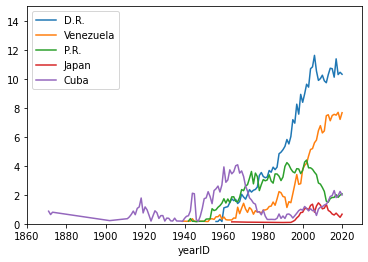

In [93]:

fig,ax=plt.subplots()

tmp[tmp['birthCountry']=='D.R.'].plot.line('yearID','percent',ax=ax,label='D.R.')
tmp[tmp['birthCountry']=='Venezuela'].plot.line('yearID','percent',ax=ax,label='Venezuela')
tmp[tmp['birthCountry']=='P.R.'].plot.line('yearID','percent',ax=ax,label='P.R.')
tmp[tmp['birthCountry']=='Japan'].plot.line('yearID','percent',ax=ax,label='Japan')
tmp[tmp['birthCountry']=='Cuba'].plot.line('yearID','percent',ax=ax,label='Cuba')


plt.axis([1860, 2030, 0, 15])

plt.title('')

In [ ]:
fig,ax=plt.subplots()

tmp[tmp['birthCountry']=='USA'].plot.line('yearID','percent',ax=ax,label='USA')
plt.axis([1860, 2030, 50, 100]);


In [ ]:
birth_state_df = df_2000.groupby(['birthCity','birthCountry','birthState'],as_index=False).count()
birth_state_df = birth_state_df[['birthCity','birthCountry','birthState','playerID']]

birth_state_df

# .groupby('playerID')['birthState'].value_counts()

# la_county=[]

# for index, row in birth_country_df.iterrows():
#     share = row['Count']/birth_country_df['Count'].sum()
#     share_per = round(share*100,2)
#     country_share.append(share_per)

In [41]:
temp_df4 = pd.DataFrame.merge(df,bat_df,on='playerID')
temp_df4 = temp_df4.replace(np.nan, '', regex=True)
df2_2000=temp_df4[(temp_df4['yearID']>1999)]
df2_2000[['playerID','nameFirst','nameLast','birthCountry','birthState','birthCity','AB','H','yearID']]
df2_2000[['playerID','nameFirst','nameLast','birthCountry','birthState','birthCity','HR','yearID']]
country_hrs = df2_2000.groupby('birthCity')['HR'].count()
country_hrs.sort_values(ascending=False).reset_index(drop=True)

country_hrs_share=[]

for country in country_hrs:
    share = country/country_hrs.sum()
    share_per = round(share*100,2)
    country_hrs_share.append(share_per)

country_hrs = pd.Series.to_frame(country_hrs)
country_hrs.reset_index(level=0, inplace=True)
country_hrs['Percent Share']=country_hrs_share
country_hrs.columns=['Birth City','Home Runs','HR Percent Share']
country_hrs.sort_values(by="HR Percent Share",ascending=False).reset_index(drop=True)



KeyError: 'playerID'